In [1]:
import scanpy as sc
import numpy as np

import os
BASE_DIR = "../"

import importlib

## QC 

### Preprocess

In [2]:
#Maybe move below to constants file
DATA_DIR = os.path.join(BASE_DIR,"data")
FIGURE_DIR = os.path.join(BASE_DIR,"figures")

NR_samples = {
    "NR1": os.path.join(DATA_DIR,"NR","AM3N207"),
    "NR2": os.path.join(DATA_DIR,"NR","AM3N208")
}
DR_samples = {
    "DR1": os.path.join(DATA_DIR,"DR","AM3N209"),
    "DR2": os.path.join(DATA_DIR,"DR","AM3N210")
}



In [27]:
import stereo_seq.utils.load as sul

output_dir = os.path.join(DATA_DIR,"aggregated")
if not os.path.exists(output_dir):
    os.mkdir(output_dir)

adata = sul.merge_dfs(NR_samples,f="filtered_feature_bc_matrix",out_f=os.path.join(output_dir,"NR.h5ad"),format="custom")

AnnData object with n_obs × n_vars = 32285 × 11962
                    ensembl_id
gene_name                     
Xkr4        ENSMUSG00000051951
Gm1992      ENSMUSG00000089699
Gm19938     ENSMUSG00000102331
Gm37381     ENSMUSG00000102343
Rp1         ENSMUSG00000025900
...                        ...
AC124606.1  ENSMUSG00000095523
AC133095.2  ENSMUSG00000095475
AC133095.1  ENSMUSG00000094855
AC234645.1  ENSMUSG00000095019
AC149090.1  ENSMUSG00000095041

[32285 rows x 1 columns]
AnnData object with n_obs × n_vars = 32285 × 14773
                    ensembl_id
gene_name                     
Xkr4        ENSMUSG00000051951
Gm1992      ENSMUSG00000089699
Gm19938     ENSMUSG00000102331
Gm37381     ENSMUSG00000102343
Rp1         ENSMUSG00000025900
...                        ...
AC124606.1  ENSMUSG00000095523
AC133095.2  ENSMUSG00000095475
AC133095.1  ENSMUSG00000094855
AC234645.1  ENSMUSG00000095019
AC149090.1  ENSMUSG00000095041

[32285 rows x 1 columns]


View of AnnData object with n_obs × n_vars = 26722 × 32285
    obs: 'sample', 'mRNA_count', 'n_mito', 'pct_mito', 'n_genes', 'n_counts'


/Users/kushalnimkar/miniforge3/envs/stereo_seq/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Users/kushalnimkar/miniforge3/envs/stereo_seq/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


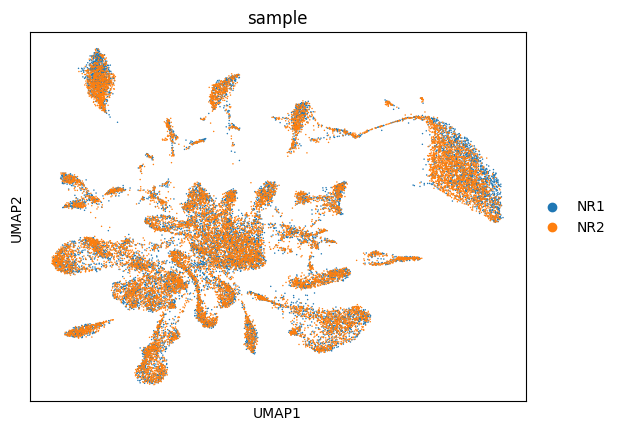

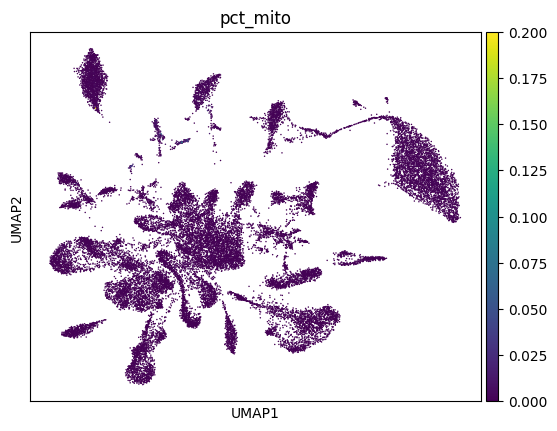

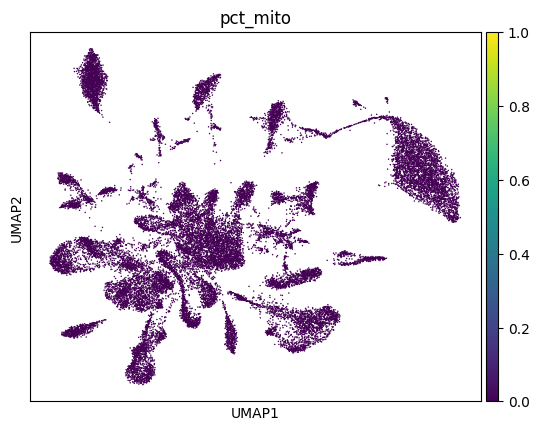

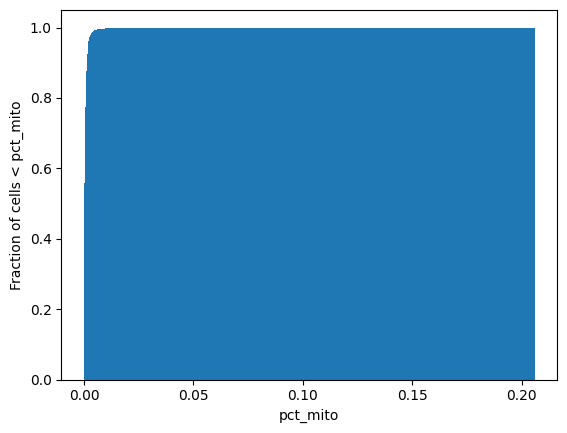

AnnData object with n_obs × n_vars = 26722 × 3000
    obs: 'sample', 'mRNA_count', 'n_mito', 'pct_mito', 'n_genes', 'n_counts', 'leiden'
    var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'hvg', 'log1p', 'pca', 'neighbors', 'leiden', 'umap', 'sample_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'log1p'
    obsp: 'distances', 'connectivities'

In [41]:
import stereo_seq.utils.preprocessing as sup
importlib.reload(sup)
#sc.pp.calculate_qc_metrics(adata,inplace=True)
#sup.precluster_QC(adata)

figure_dir = os.path.join(FIGURE_DIR,"NR","QC")
if not os.path.exists(figure_dir):
    os.mkdir(figure_dir)

input_f = os.path.join(DATA_DIR,"aggregated","NR.h5ad")
adata=sc.read_h5ad(input_f)
sup.pipeline(adata,batch=False,output_f=os.path.join(DATA_DIR,"aggregated","NR_filt.h5ad"),figure_dir=figure_dir)

In [43]:
adata=sc.read_h5ad(os.path.join(DATA_DIR,"aggregated","NR_filt.h5ad"))

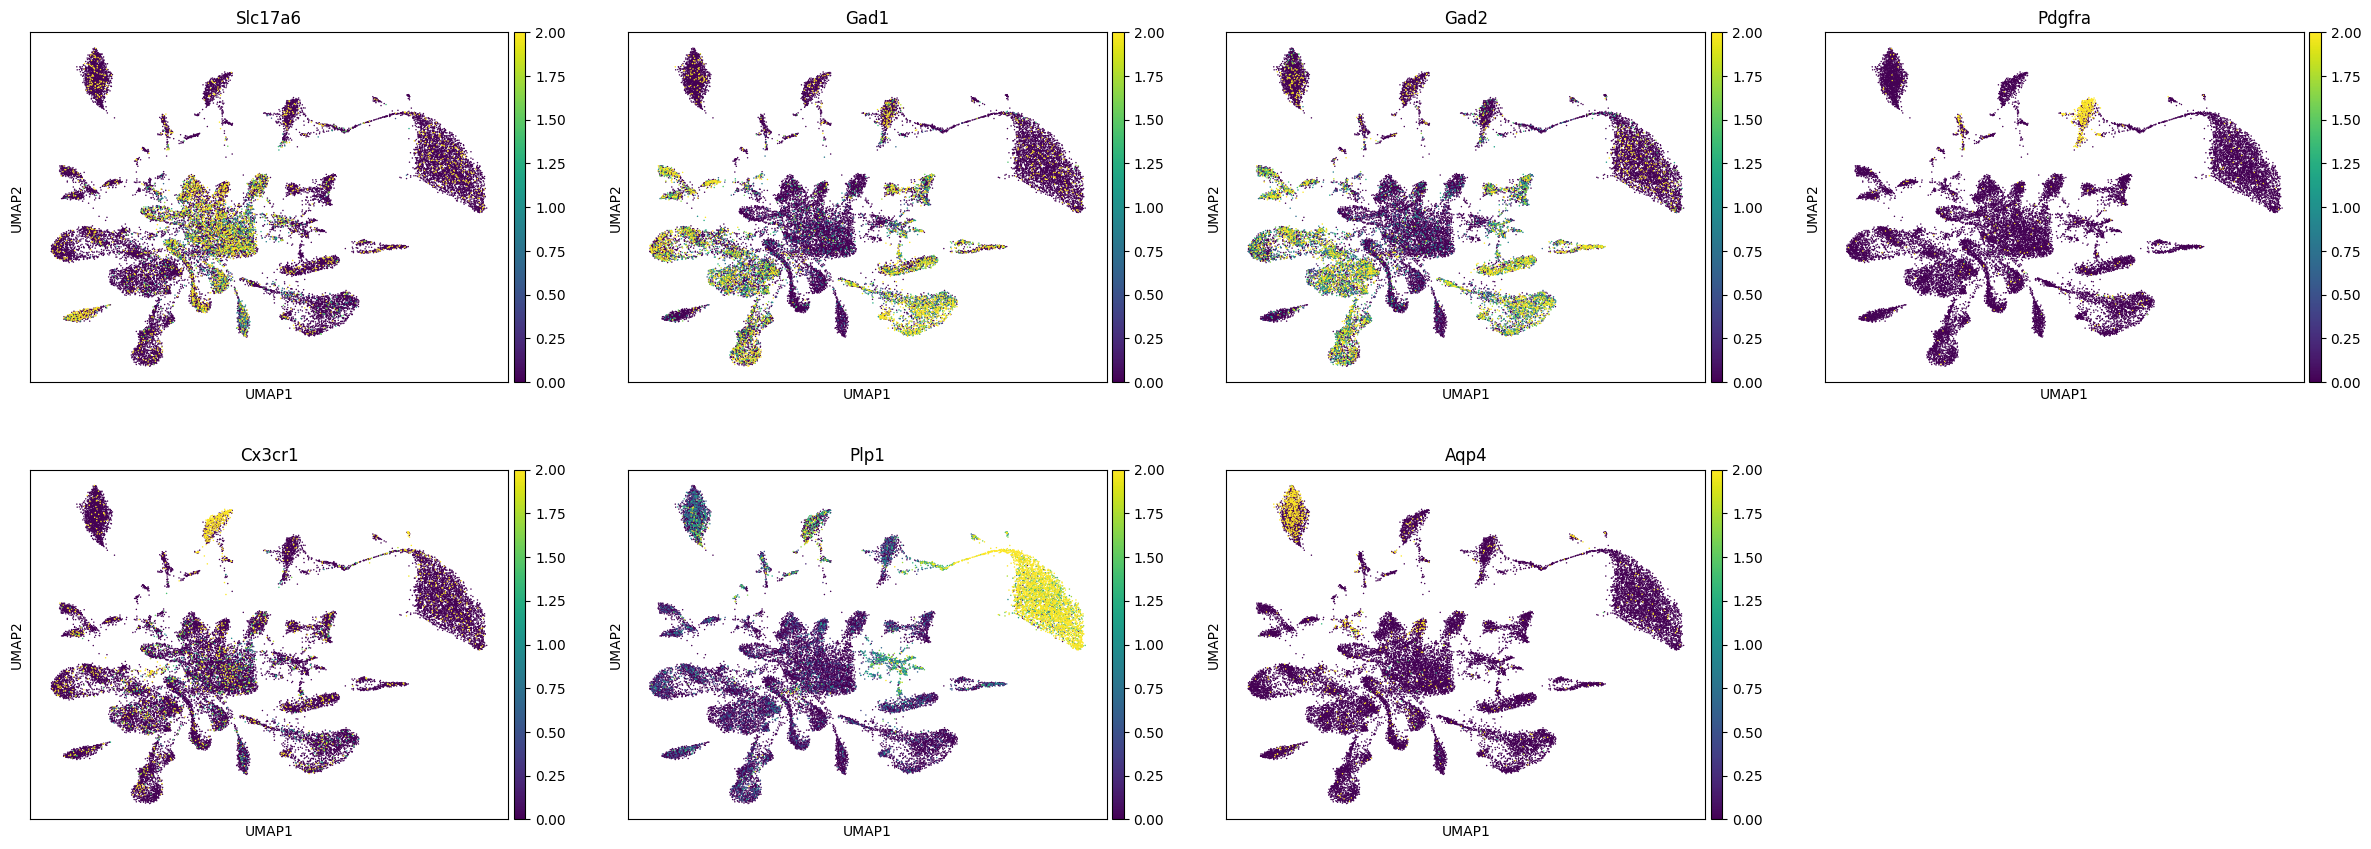

In [59]:
#sc.pl.umap(adata,color='n_counts')
#sc.pl.umap(adata,color='n_genes')
#sc.pl.umap(adata,color='leiden')
sc.pl.umap(adata,color=['Slc17a6','Gad1','Gad2','Pdgfra','Cx3cr1','Plp1','Aqp4'],use_raw=False,vmin=0,vmax=2)